<a href="https://colab.research.google.com/github/karanidenis/heart-disease-analysis/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Dataset Analysis

### Libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Pre-processing

In [2]:

# Define the column names
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# Read the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Display the data to verify
print(data.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
print(data.isnull().sum())
df = data.dropna()
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [5]:
df_1 = pd.DataFrame(df)
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]

In [7]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [8]:
# Define preprocessing for numerical features (impute missing values, then scale)
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [9]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'ca']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])


In [10]:
# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Verify the preprocessing result
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_processed.shape}")

Original shape: (297, 13)
Transformed shape: (297, 25)


## K-means Clustering

###  Elbow-Method

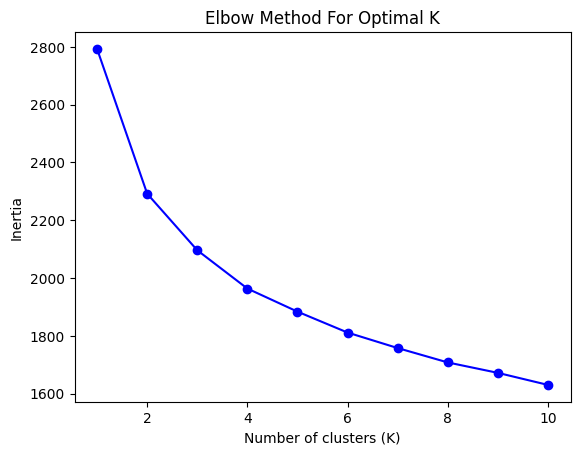

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


### K-means Clustering

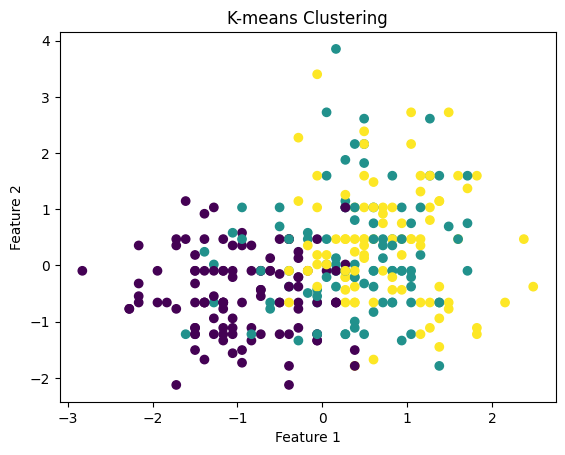

In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_processed)

# Visualize the clusters
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Silhouette and Davies bouldin Scores

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

resulst = {}
unique_labels = np.unique(kmeans_labels)
# if len(unique_labels) > 1:
if len(kmeans_labels) > 1:
  silhouette_avg = silhouette_score(X_processed, kmeans_labels)
  davies_bouldin_avg = davies_bouldin_score(X_processed, kmeans_labels)

  results = {
      "silhouette_score": silhouette_avg,
      "davies_bouldin_score": davies_bouldin_avg
  }
else:
  results = {
      "silhouette_score": None,
      "davies_bouldin_score": None
  }

print(results['silhouette_score'])
print(results['davies_bouldin_score'])

0.12548779880928132
2.2931351749402356


## Hierarchical Clustering

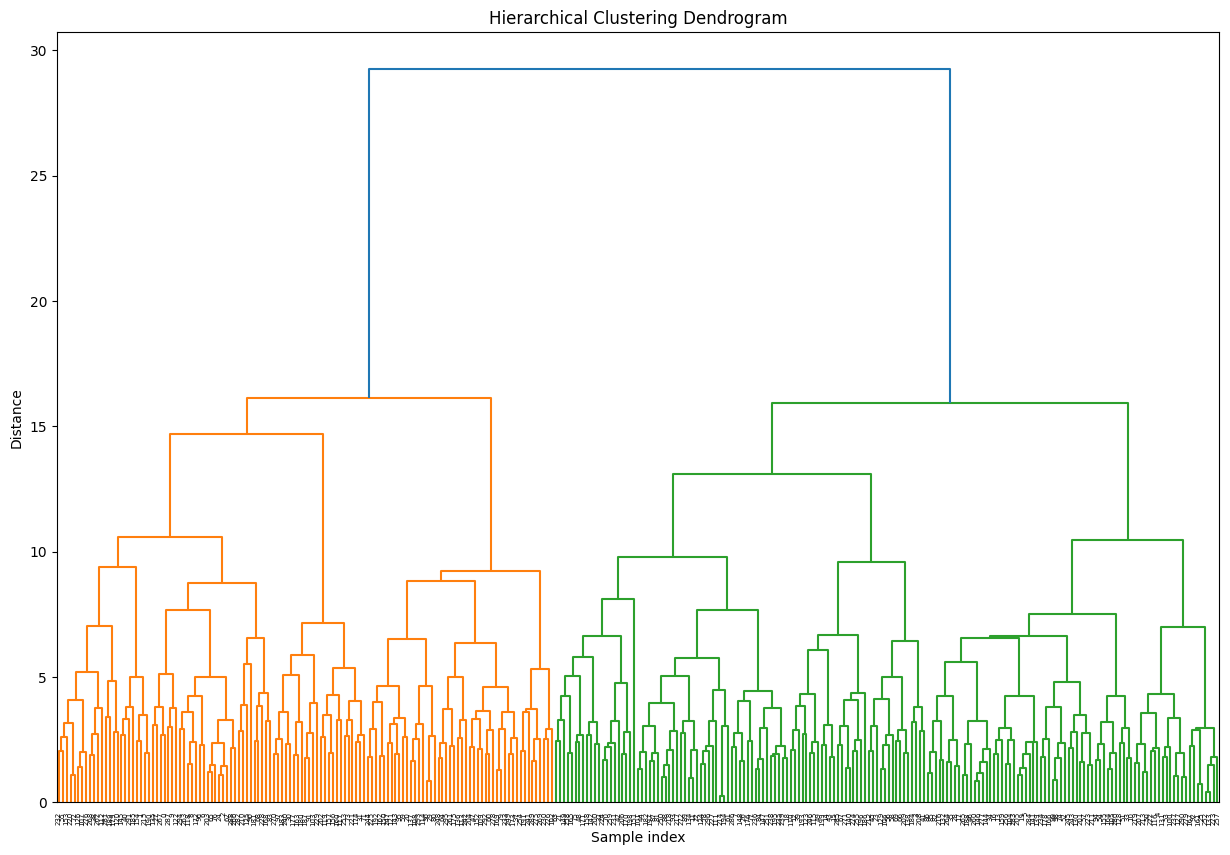

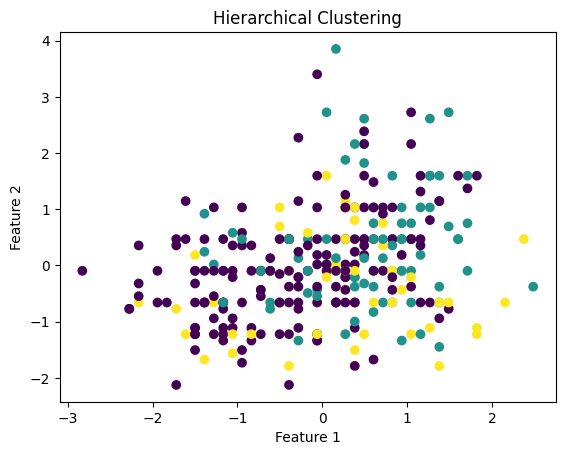

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering
linked = linkage(X_processed, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(X_processed)

# Visualize the clusters
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### silhouette_score and davies_bouldin_score

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_processed, agg_labels)
davies_bouldin_avg = davies_bouldin_score(X_processed, agg_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.10983581213190548
Davies-Bouldin Index: 2.477646762942503


## DBSCAN Clustering

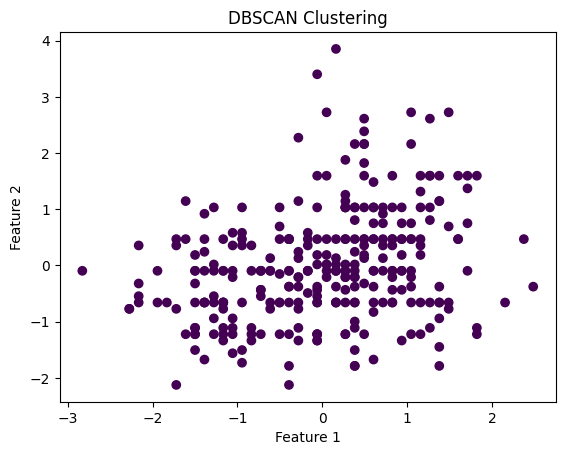

In [19]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_processed)

# Visualize the clusters
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### silhouette and davis bouldin Scores

In [20]:
# Grid search for DBSCAN parameters
eps_values = np.arange(0.3, 1.1, 0.1)
# print(eps_values)
min_samples_values = range(2, 10)
best_silhouette = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_processed)
        unique_labels = np.unique(labels)

        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(X_processed, labels)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")

# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = best_dbscan.fit_predict(X_processed)
# dbscan_silhouette_avg = silhouette_score(X_processed, dbscan_labels)
dbscan_davies_bouldin_avg = davies_bouldin_score(X_processed, dbscan_labels)

# print(f"DBSCAN with best parameters - Silhouette Score: {dbscan_silhouette_avg}")
print(f"DBSCAN with best parameters - Davies-Bouldin Index: {dbscan_davies_bouldin_avg}")

Best DBSCAN parameters: eps=1.0000000000000002, min_samples=3
Best Silhouette Score: -0.08336784371860378
DBSCAN with best parameters - Davies-Bouldin Index: 1.3383603330755387


## PCA

### PCA K-means Clustering

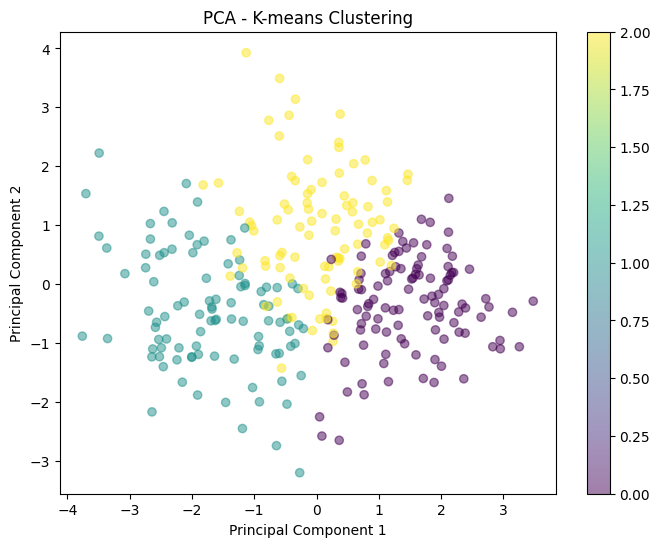

In [21]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('PCA - K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


### PCA Hierachical Clustering

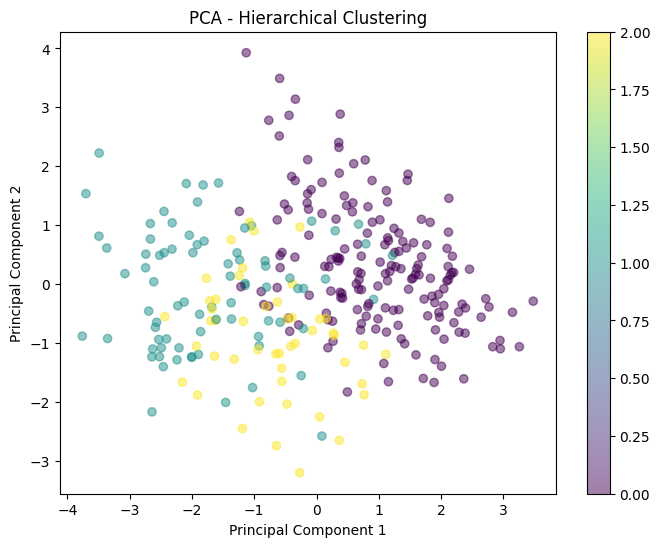

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('PCA - Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

### PCA DBSCAN Clustering

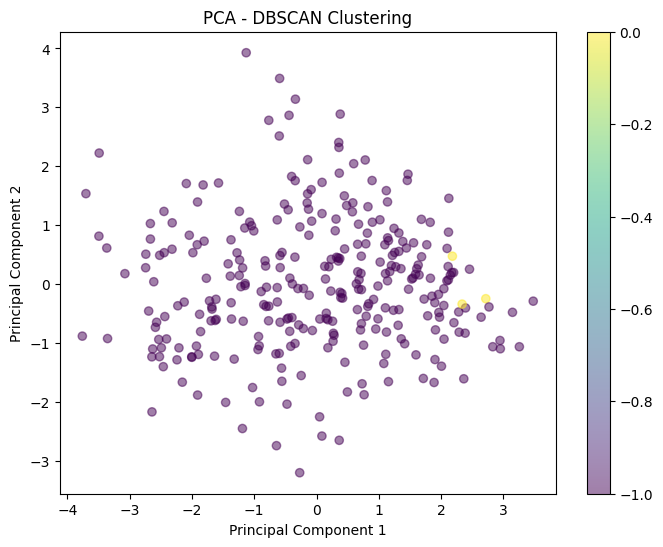

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('PCA - DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## t-SNE

### T-Sne K-means

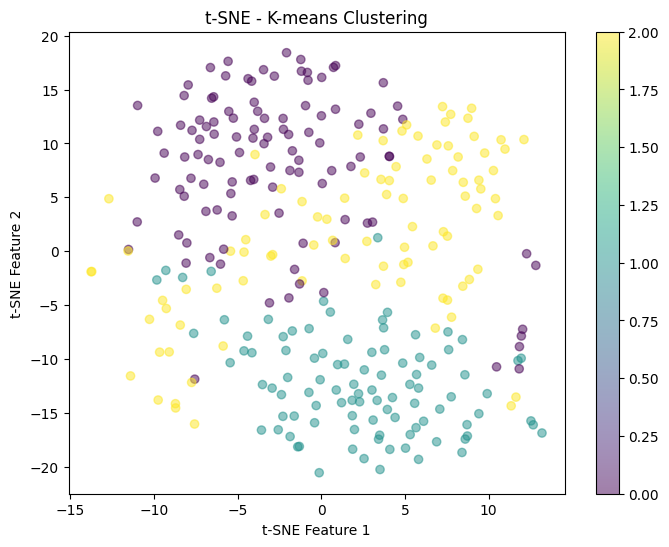

In [25]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_processed)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE - K-means Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()


### Hierachical T-nse

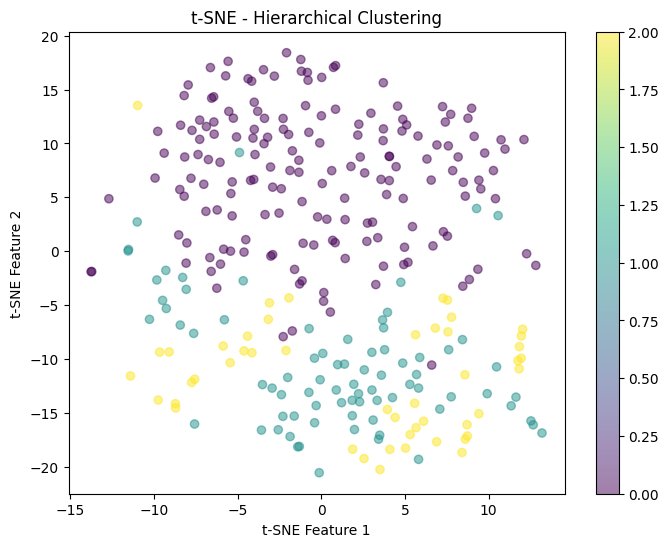

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE - Hierarchical Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()


### DBSCAN t-SNE

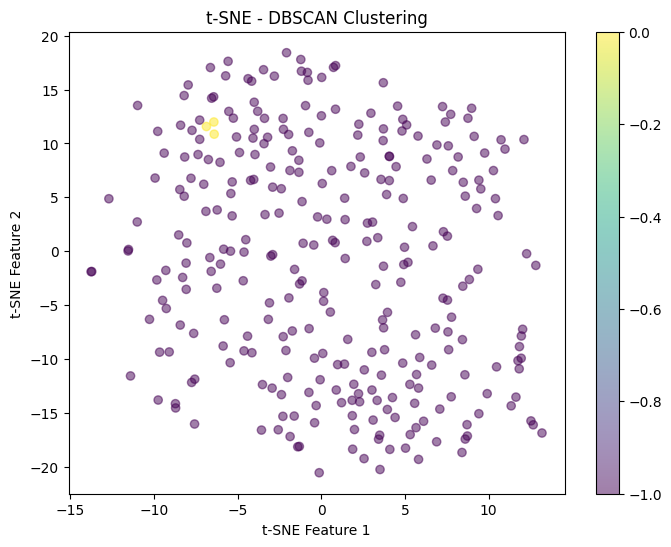

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE - DBSCAN Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()

## GMM

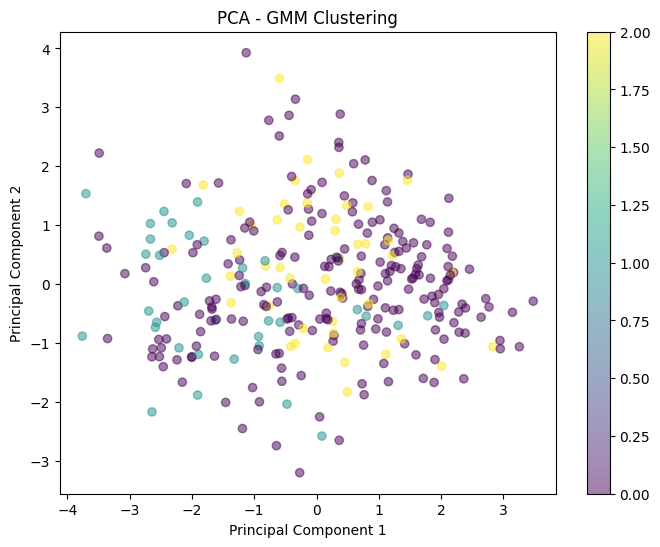

In [28]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_processed)

# Apply PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('PCA - GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [30]:
# Add cluster labels to the original data
df['cluster'] = gmm_labels

# Calculate the mean of the features for each cluster
cluster_means = df.groupby('cluster').mean()
print(cluster_means)


               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        53.693396  0.646226  3.311321  128.716981  250.084906  0.000000   
1        56.666667  0.717949  3.641026  140.820513  242.461538  0.461538   
2        56.652174  0.782609  2.043478  137.673913  238.891304  0.543478   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        0.943396  150.971698  0.311321  0.882547  1.495283  0.603774   
1        1.230769  138.051282  0.564103  2.202564  2.358974  1.076923   
2        1.043478  153.065217  0.195652  0.880435  1.456522  0.673913   

             thal       num  
cluster                      
0        4.603774  0.867925  
1        5.769231  1.948718  
2        4.434783  0.456522  


<ipython-input-30-7de8eb74c02b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = gmm_labels


In [31]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_processed, gmm_labels)
davies_bouldin_avg = davies_bouldin_score(X_processed, gmm_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.03037139871552713
Davies-Bouldin Index: 4.195164182171709


**Clustering Performance Comparison**

**K-means Clustering**


*   Silhouette Score: 0.1254
*   Davies-Bouldin Index: 2.2931



**DBSCAN Clustering**


*   Silhouette Score: -0.0833

*   Davies-Bouldin Index: 1.3383



**Hierarchical Clustering**


*   Silhouette Score: 0.1098

*   Davies-Bouldin Index: 2.4776


**Gaussian Mixture Model**


*   Silhouette Score: 0.0303

*   Davies-Bouldin Index: 4.1951



**Best Performing Algorithm Analysis**

K-means emerges as the most effective clustering algorithm for this dataset because:

It achieved the highest Silhouette Score (0.1254)

While its Davies-Bouldin Index isn't the lowest, it provides a better balance of cluster separation and cohesion compared to other methods

**Clustering Performance Notes**

*   All algorithms show relatively low Silhouette Scores (<0.2), indicating challenging cluster separation in this medical dataset
*   DBSCAN's negative Silhouette Score suggests potential issues with noise handling

*   GMM shows the highest Davies-Bouldin Index, indicating less distinct cluster separation

